Lab - 8 Kmeans Clustering

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [5]:
#center points that we will spread each clusters around
actual_centroids = [(-2.5,5), (5, 12), (10, 0)]

#standard deviation of data points to be generated around above centers
data_points_deviations_from_centroids = (2.5, 2, 3)

#number of clusters
K = len(actual_centroids)
cluster_sizes = [100, 100, 100]
data_points = []
for i in range(K):
    data_points_cluster_i = np.random.normal(actual_centroids[i], data_points_deviations_from_centroids[i], (cluster_sizes[i], 2))
    data_points.append(data_points_cluster_i)

#add all data points for each cluster
data_points = np.vstack(data_points)

In [ ]:
#initialize centroids randomly
centroids = np.random.randn(K, 2)

In [11]:
label_to_color = lambda x: cm.rainbow(x/3)

In [7]:
def plot_data_points(ax, points, labels=None):
  #based on labels arguments passed, color the data in different ways and plot in  a scatter plot
  color = 'b' #default point color is blue
  if isinstance(labels, str):
    color = labels
  elif isinstance(labels, int):
    color = label_to_color(points[:,labels])
  elif isinstance(labels, np.ndarray):
    color = label_to_color(labels)

  ax.scatter(x = points[:,0], y = points[:,1], c=color)

In [8]:
def plot_centroids(ax, centroids):
  #scatter function requires x and Y coordinate values in two seperate lists but our centroids variable is expected to contain array of points
  #so we use unpacking operator * along with zip function to get such list
  ax.scatter(*zip(*centroids), marker='X', s = 200, color = 'k', edgecolor = 'w')

In [9]:
def contour_plot(z_value_func, xlim, ylim, resolution = 0.01, figsize = (8,6)):
  xx, yy = np.meshgrid(np.arange(xlim[0], xlim[1], resolution), np.arange(ylim[0], ylim[1], resolution))
  mesh_points = np.c_[xx.ravel(), yy.ravel()]  ##numpy.c_ converts 1d array to 2d before concatenating along second axis
  zz = z_value_func(mesh_points)
  zz = zz.reshape(xx.shape)

  plt.figure(figsize=figsize)
  ax = plt.gca()
  ax.contourf(xx, yy, zz, alpha=0.3, cmap='viridis')

  return ax

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


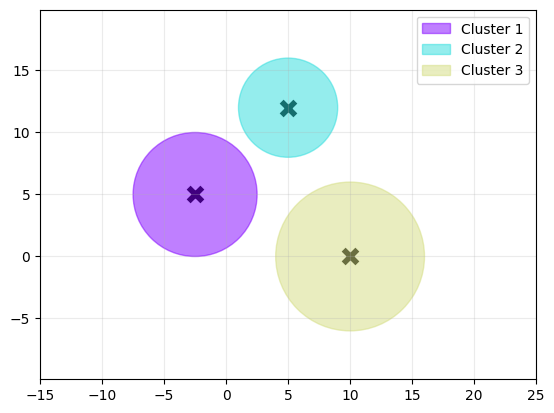

In [12]:
#plotting the centroids
plot_centroids(plt, actual_centroids)

plt.axis("equal")
plt.axis([-15, 25, -10, 20])
plt.grid(True, alpha = 0.25)

#plotting the probable region for each cluster
for centroid, deviation, i in zip(actual_centroids, data_points_deviations_from_centroids, range(K)):
  circle = plt.Circle(centroid, radius = 2 * deviation, color=label_to_color(i), alpha=0.5, label=f'Cluster {i+1}')
  plt.gca().add_artist(circle)

plt.legend(loc="upper right")
plt.show()